<a href="https://colab.research.google.com/github/negodinaarina/data_visualisation/blob/main/second_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этой работе вам предстоит исследовать неточности в данных и устранить их. В конце – проанализировать результаты.

Все необходимые этапы предобработки данных описаны в задании, ваша задача – реализовать их.

# Данные

[Monster.com jobs](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data) - датасет о вакансиях, данные в котором намеренно не предобработаны. Есть несколько сомнительных столбцов с 1 уникальным значением, тип работы не стандартизирован, расположение может содержать штат, город и почтовый индекс или только часть из этих данных, или совершенно неясные данные вроде "Contact name Tony Zerio" или "Sr. Process Engineer, Manufacturing", в графе с зарплатой помимо зарплаты есть вещи вроде "Excellent Pay and Incentives" и другие проблемы.

Практически все столбцы в датасете нельзя использовать для анализа без предобработки.

К датасету на kaggle приложен блокнот с примером его очистки. Рекомендуется ознакомиться с ним после выполнения задания, чтобы оценить сходства и различия в подходах.

Целью обработки датасета будем считать использование для многостороннего изучения данных в дальнейшем, то есть мы обработаем данные таким образом чтобы их удобно было использовать для широкого спекра задач анализа данных.

### Изучение датасета

In [ ]:
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt

Загрузите датасет и выведите случайные несколько строк из него. Постарайтесь понять, что из себя представляют данные в столбцах.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/monster_com-job_sample.csv")
dataset.sample(50)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
13370,United States of America,US,NaN,No,jobs.monster.com,Quality and Regulatory Affairs Manager We are ...,Quality and Regulatory Affairs Manager Job in ...,Full Time,"West Miami, FL",Biotechnology/Pharmaceuticals,http://jobview.monster.com/Quality-Regulatory-...,NaN,Manager (Manager/Supervisor of Staff),752c38439c6bcb7af8f85fd82778a448
13791,United States of America,US,NaN,No,jobs.monster.com,Orbital ATK is currently seeking an experience...,Sr. Inspector Job in Elkton,Full Time,"Elkton, MD 21921",Aerospace and Defense,http://jobview.monster.com/Sr-Inspector-Job-El...,NaN,Manager (Manager/Supervisor of Staff),63296a392bb8c1d963e5cdbf8e173521
4979,United States of America,US,NaN,No,jobs.monster.com,Job Summary: Responsible for assisting physici...,Medical Assistant Job in Columbus,Full Time,"Columbus, OH",Healthcare Services,http://jobview.monster.com/Medical-Assistant-J...,NaN,NaN,71d2165a4ec9edd8006ef0ca36bb480b
21494,United States of America,US,NaN,No,jobs.monster.com,Advertising Sales Account Executive Our Advert...,Advertising Account Representative- (Marketing...,"Full Time, Employee","Cincinnati, OH 45202",NaN,http://jobview.monster.com/Advertising-Account...,"40,000.00 - 100,000.00 $ /year",Sales/Retail/Business Development,6769e31197a0d6a5d58c24b6aab95b80
16733,United States of America,US,NaN,No,jobs.monster.com,RESPONSIBILITIES:Kforce has a client that is s...,Technical PM Job in Minneapolis,"Full Time, Temporary/Contract/Project","Minneapolis, MN 55479",NaN,http://jobview.monster.com/technical-pm-job-mi...,NaN,Experienced (Non-Manager),bd7c51db0e490b10a6a090b4c4b18e52
6564,United States of America,US,NaN,No,jobs.monster.com,***Multiple Positions Available***GENERAL FUNC...,Instructional Assistant III - Special Educatio...,Full Time Employee,"West Jordan, UT 84084",Education,http://jobview.monster.com/instructional-assis...,NaN,Education/Training,ec6ac720c96d3aac807703f248325695
3612,United States of America,US,NaN,No,jobs.monster.com,CHRISTUS Home Health of Lake Charles is seekin...,LPN/LVN- Home Health Job in Lake Charles,"Full Time, Employee","Lake Charles, LA 70605",Healthcare Services,http://jobview.monster.com/LPN-LVN-Home-Health...,NaN,Medical/Health,eebb3e3cbb537e9267ac6b5039b2c228
18480,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job Community Connec...,Community Connections Inc. Job Application for...,"Full Time, Employee",Contact name Susan Egmont,Nonprofit Charitable Organizations,http://jobview.monster.com/president-ceo-job-s...,NaN,NaN,610ee0f79d15fa6ab9eede601dbda215
11504,United States of America,US,NaN,No,jobs.monster.com,The Onsite Engineer Recruiter is responsible f...,Onsite Contract Engineer Recruiter - Austin,NaN,Full Time Employee,Full Time Employee,http://jobview.monster.com/onsite-contract-eng...,NaN,NaN,cc7883ce28d0faf2caf35dcc077642f1
5916,United States of America,US,NaN,No,jobs.monster.com,Job Description:Seeking an experienced Legal A...,Legal Assistant - Litigation Job in Las Vegas,Full Time,"Las Vegas, NV 89113",Other/Not Classified,http://jobview.monster.com/Legal-Assistant-Lit...,Up to $45000.00,Experienced (Non-Manager),17eda4f36cae2d575095800aff3e33c4


**Задание**

Составьте таблицу, в которой будет содержаться название столбца, тип данных в нем и краткое описание проблем, которые вы заметили при первом взгляде на данные.

(Таблицу можно представить в виде текстового поля, датафрейма или картинки – формат неважен, важно содержание)

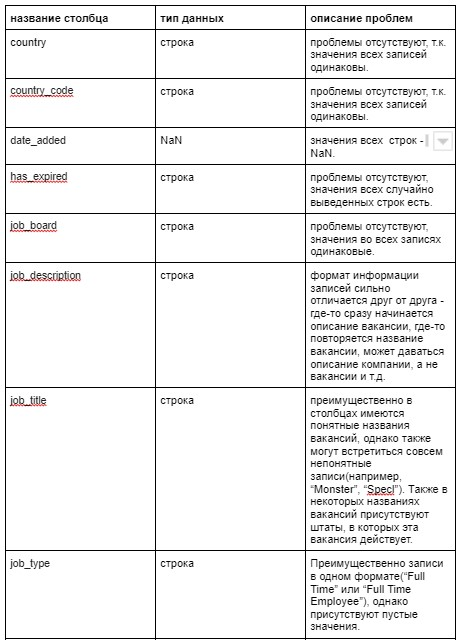

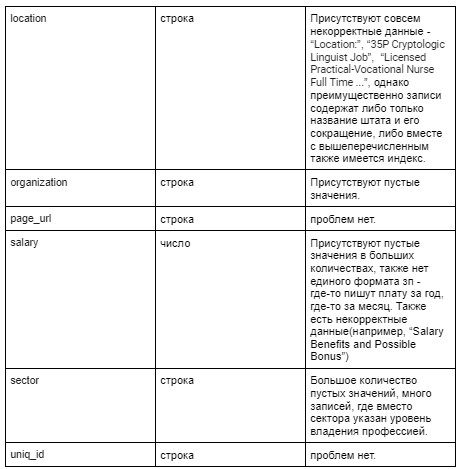

#### Пустые значения

Начнем работу: проанализируем пустые ячейки.
Выясните, в каких столбцах и в каком количестве отсутствуют данные.

> Помимо создания таблички, воспользуйтесь библиотекой `missingno` и визуально оцените количество пропущенных данных.

In [ ]:
#Вывод количества значений NaN по каждому из столбцов.
nan = dataset.isna().sum()
print(nan)

country                0
country_code           0
date_added         21878
has_expired            0
job_board              0
job_description        0
job_title              0
job_type            1628
location               0
organization        6867
page_url               0
salary             18554
sector              5194
uniq_id                0
dtype: int64


<Axes: >

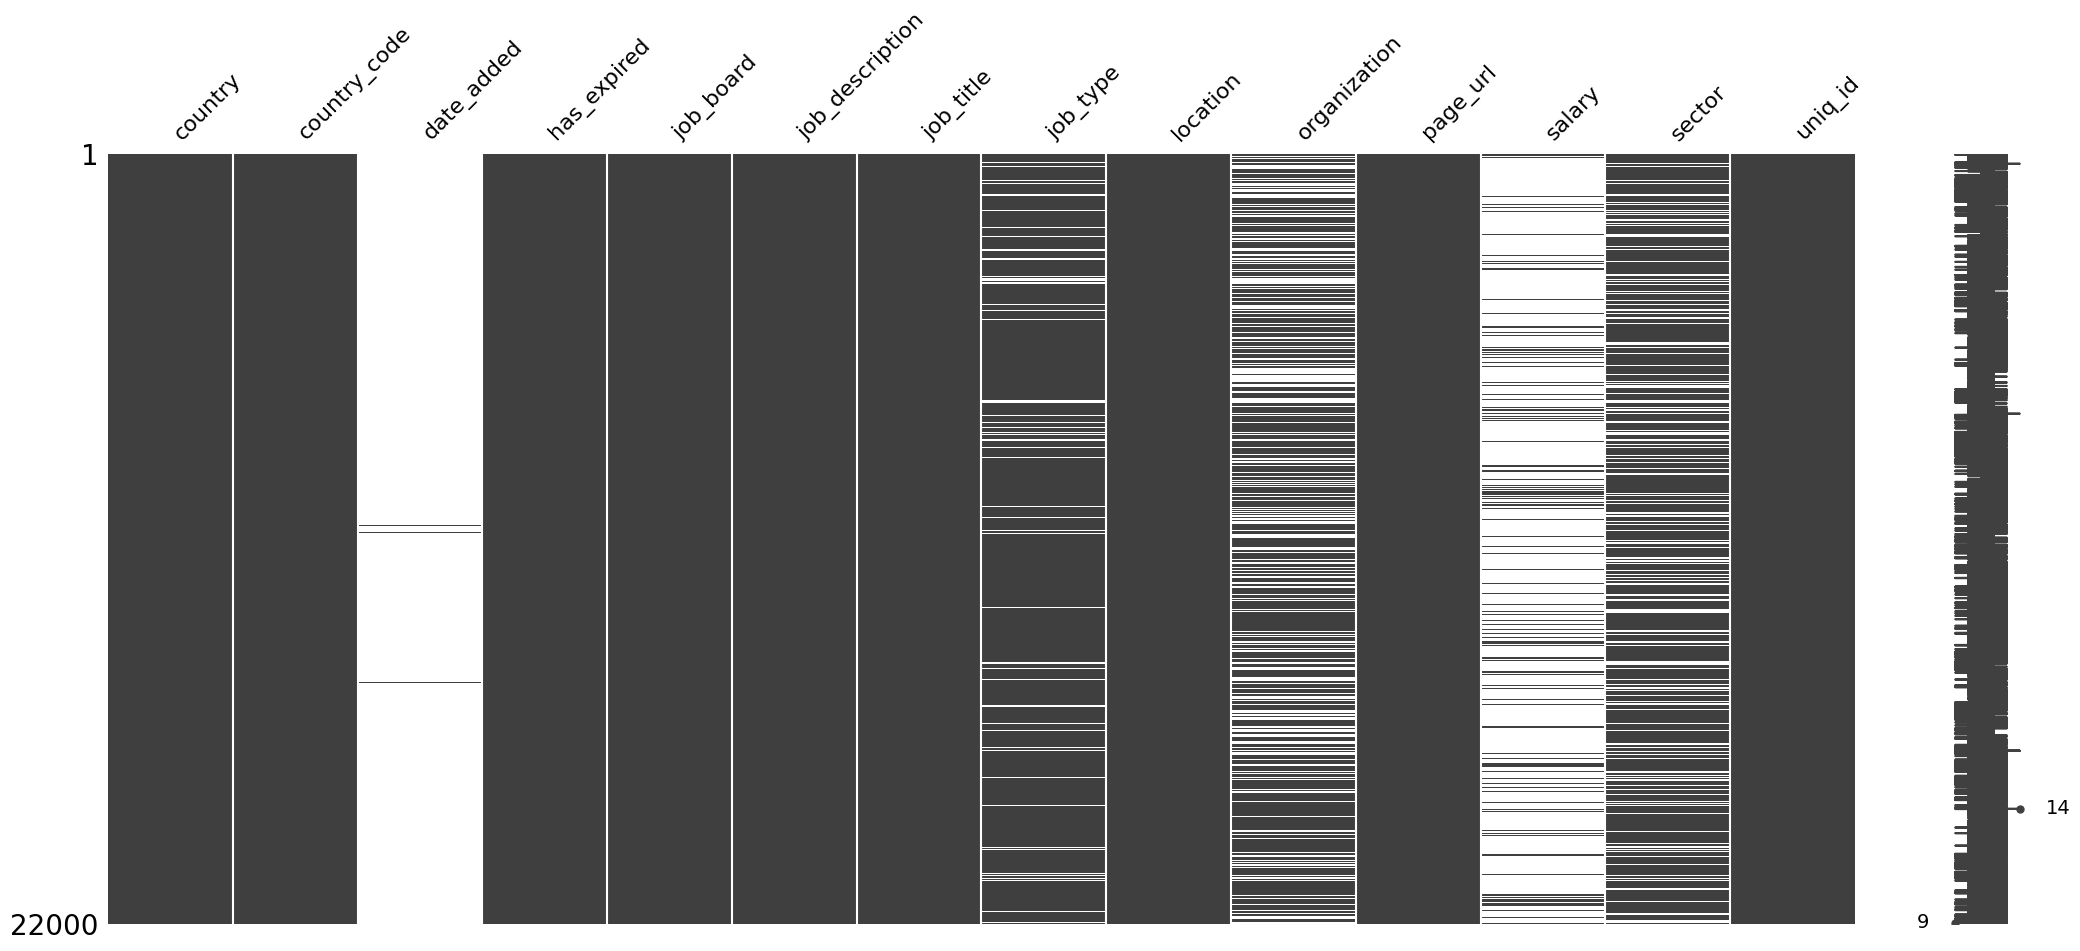

In [ ]:
#Визуализация пропущенных данных в виде матрицы
msno.matrix(dataset)

Проверьте, как изменится размер датасета, если мы примем решение удалить все строки, где есть пустые значения. Сделайте выводы.

In [ ]:
no_nan_ds = dataset.dropna()
print("Размер при удалении строк с пустыми значениями")
no_nan_ds.shape

Размер при удалении строк с пустыми значениями


(5, 14)

**Вывод**: удалять строки с пустыми значениями нельзя, т.к. теряется большая часть данных.

#### Нерелевантные колонки

Оценим, какие столбцы необходимо оставить, а какие можно удалить.
Рассмотрите следующие идеи:
1. Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?
2. Есть ли столбцы, в которых содержатся данные, которые есть еще в каком-то столбце?
3. Какие столбцы содержательно нерелевантны? Обоснуйте.

In [ ]:
print(f"количество уникальных значений в столбце country - {dataset['country'].nunique()}")
print(f"количество уникальных значений в столбце country_code - {dataset['country_code'].nunique()}")
print(f"количество уникальных значений в столбце job_board - {dataset['job_board'].nunique()}")
print(f"количество уникальных значений в столбце has_expired - {dataset['has_expired'].nunique()}")

количество уникальных значений в столбце country - 1
количество уникальных значений в столбце country_code - 1
количество уникальных значений в столбце job_board - 1
количество уникальных значений в столбце has_expired - 1


1.В столбцах 'country', 'country_code', 'job_board', 'has_expired' встречается всего одно значение, т.к. датасет взят с сайта monster.com.jobs, то данные столбцы не имеют применения в анализе.

2.В столбце job_title встречаются данные из столбца location.

3.Содержательно нерелевантыми являются столбцы из первого пункта('country', 'country_code', 'job_board', 'has_expired'), так как все данные взяты с одного сайта для одной страны. Также содержательно нерелевантными являются столбцы 'page_url'(ссылка на страницу вакансии) и 'uniq_id', так как эти данные не являются характеристиками вакансий и не несут в себе важной информации.

#### Дублирование данных

Определите столбцы, по которым можно однозначно идентифицировать запись в датасете. Одинаковыми будем считать строки, в которых значения в этих столбцах совпадает.

Удалите одно из двух повторений и сравните, как изменились характеристики датасета.

**Однозначно можно определить запись в датасете по группе столбцов - job_title,  location, organization, salary**

In [ ]:
no_duplicates = dataset.drop_duplicates(subset=['job_title', 'location', 'organization', 'salary'])
no_duplicates.shape

(20006, 14)

Размер датасета стал меньше на 2000 строк.

### Обработка датасета

#### Первичная обработка

Выше мы оценили, какие есть проблемы с дубликатами и отсутствующими значениями.

Первым делом устраним их. Удалим все, что можно удалить без потери данных. На всякий случай сохраним копию датасета. В конце нам понадобится оценивать результаты. Она пригодится.

In [ ]:
#Сохранение копии датасета
ds_copy = dataset.copy()

In [ ]:
# Удаление строк или столбцы с пустыми ячейками
dataset = dataset.drop(['date_added'], axis=1)

In [ ]:
# Удаление нерелевантных столбцов
dataset = dataset.drop(['country','country_code','job_board','has_expired', 'uniq_id', 'page_url'], axis=1)

In [ ]:
# Удаление дубликатов
dataset = dataset.drop_duplicates (subset=['job_title', 'location', 'organization', 'salary'])

#### Обработка колонки location

Выясните, какие форматы значений есть в столбце `location`. Сделайте выводы.

In [ ]:
unique_l = dataset.location.unique()
valid_location = []
for l in unique_l:
  if len(l.split(',')) == 2 and l not in valid_location:
    valid_location.append(l)
valid_location


При просмотре массива можно выделить два формата - город и штат, город, штат и индекс.

На этом этапе у вас должно получиться минимум 2 валидных формата данных (город+код штата, город+код штата+индекс). Напишите регулярные выражения или воспользуйтесь известными вам методами обработки текста для поиска этих форматов. Если, на ваш взгляд, стоит выделить больше форматов, сделайте это.

In [ ]:
location_df = pd.DataFrame(dataset['location'])
location_df["format"] = 'invalid'
for row in location_df.iterrows():
  if re.fullmatch('\w{1,20}, [A-Z]{2}', row[1]['location']):
    row[1]['format'] = 'city_state'
  if re.fullmatch('.*, .. \d{5}', row[1]['location']):
    row[1]['format'] = 'city_state_index'


In [ ]:
location_df

,location,format
0,"Madison, WI 53702",city_state_index
1,"Madison, WI 53708",city_state_index
2,DePuy Synthes Companies is a member of Johnson...,invalid
3,"Dixon, CA",city_state
4,"Camphill, PA",city_state
...,...,...
21995,"Cincinnati, OH",city_state
21996,"Cincinnati, OH 45236",city_state_index
21997,"Chicago, IL 60602",city_state_index
21998,"Chicago, IL 60609",city_state_index


Визуализируйте количество найденных форматов данных на столбиковой или круговой диаграмме.

<Axes: xlabel='format'>

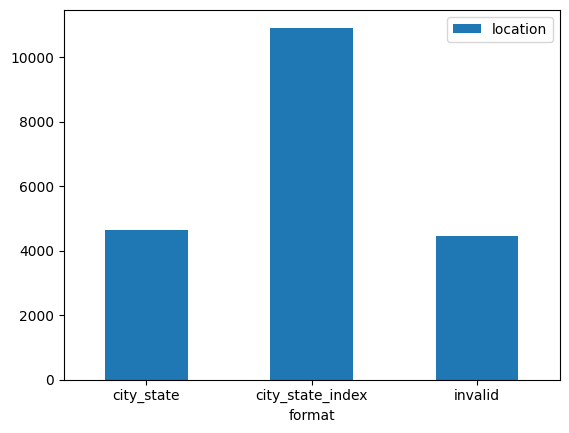

In [ ]:
vdata = location_df.groupby("format")["location"].count().reset_index()
vdata.plot.bar(x='format', y='location', rot=0)

Строки с невалидными данными выделяем в отдельный датасет. Остальные данные локаций разделяем на 3 колонки: город, штат, индекс. Колонка индекс будет содержать пустые значения.

In [ ]:
dataset = dataset.merge(location_df).drop_duplicates()
invalid = dataset.loc[dataset['format'] == 'invalid']
dataset = dataset.loc[dataset['format'] != 'invalid']


In [ ]:
cities = dataset['location'].str.split(',')
dataset['city'] = cities.str[0]
locations = cities.str[1]
locations = locations.str.split(' ')
dataset['state'] = locations.str[1]
dataset['index'] = locations.str[2]
dataset



,job_description,job_title,job_type,location,organization,salary,sector,format,city,state,index
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,IT/Software Development,city_state_index,Madison,WI,53702
4,TeamSoft is seeking a Project Manager for the...,Project Manager Job in Madison,Full Time Temporary/Contract/Project,"Madison, WI 53702",NaN,NaN,Project/Program Management,city_state_index,Madison,WI,53702
8,RESPONSIBILITIES:Kforce has a client seeking a...,Systems Engineer Job in Madison,"Full Time, Temporary/Contract/Project","Madison, WI 53702",NaN,NaN,Experienced (Non-Manager),city_state_index,Madison,WI,53702
12,"Hi, We are looking for a Share...",SharePoint Admin - In Person Interview Job in ...,Full Time,"Madison, WI 53702",NaN,NaN,NaN,city_state_index,Madison,WI,53702
16,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,NaN,city_state_index,Madison,WI,53708
...,...,...,...,...,...,...,...,...,...,...,...
834893,RESPONSIBILITIES:Kforce client located in NKY ...,Purchasing Administrator Job in Covington,Full Time Temporary/Contract/Project,"Covington, KY 41017",NaN,15.00 - 16.00 $ /hour,Experienced (Non-Manager),city_state_index,Covington,KY,41017
834898,RESPONSIBILITIES:Kforce has a client that is s...,eCommerce Program Manager Job in Rosemont,"Full Time, Temporary/Contract/Project","Rosemont, IL 60601",NaN,NaN,"Senior Executive (President, CFO, etc)",city_state_index,Rosemont,IL,60601
834901,RESPONSIBILITIES:Kforce is working alongside a...,Staff Accountant Job in Mason,Full Time Employee,"Mason, OH 45242",NaN,"45,000.00 - 50,000.00 $ /year",Entry Level,city_state_index,Mason,OH,45242
834903,Join the Market Leader!CCL Label Cold Spring i...,Quality Engineer Job in Cold Spring,Full Time,"Cold Spring, KY 41076",Printing and Publishing,NaN,NaN,city_state_index,Cold Spring,KY,41076


Рассмотрите отложенную часть выборки и сделайте выводы о возможности извлечь из данных город, штат и индекс. Извлеките все, что возможно. Что невозможно – оставьте пустым.

In [ ]:
invalid.sample(20)

,job_description,job_title,job_type,location,organization,salary,sector,format
66927,Location US-TX-San Antonio ID 79168 Posted D...,Runner/Utility (JPL Starbucks - UTSA Location)...,"Full Time, Employee","San Antonio, TX",NaN,NaN,Food Services/Hospitality,invalid
554294,« back Learn More IT - Enterprise Resource Pla...,IT - Enterprise Resource Planning Consultant J...,Full Time Employee,"Eden Prairie, MN",Computer/IT Services,NaN,Experienced (Non-Manager),invalid
598247,Back End Web Developer - Web Design Specialize...,Back End Web Developer,NaN,Back End Web Developer - Web Design Specialize...,NaN,NaN,NaN,invalid
833454,NOW HIRINGMANAGEMENT POSITIONSDQTEXAS STOP SIG...,Restaurant Management Job in | Monster.com fu...,Full Time,76241,Restaurant/Food Services,NaN,Manager (Manager/Supervisor of Staff),invalid
769405,Report this job About the Job Job Description:...,Ennoble First Job Application for Recruiter | ...,"Full Time, Employee",Job Description: Resource SpecialistLocation:C...,Computer/IT Services,NaN,NaN,invalid
698354,Requisition Number 31484BR Title Sales & Marke...,Sales & Marketing Development Program Job in N...,Full Time Employee,"New York, NY",Automotive Sales and Repair Services,NaN,Marketing/Product,invalid
793417,Report this job About the Job Location: 100% t...,Monster,"Full Time, Employee",Location: 100% travel required At Inspection S...,Construction - Industrial Facilities and Infra...,NaN,NaN,invalid
830596,Back to search results Previous job Next job P...,Theme Cook in Austin,NaN,"Austin,TX,USA",NaN,NaN,NaN,invalid
821411,"Hi Mates, We have urgent need of below furnish...",Monster,NaN,"Hi Mates, We have urgent need of below furnish...",NaN,NaN,NaN,invalid
766355,Report this job About the Job If you are a Sup...,CyberCoders Job Application for Superintendent...,"Full Time, Employee",Contact name Aaron Wilks,Construction - Industrial Facilities and Infra...,NaN,NaN,invalid


Можно выделить форматы "Город, ШТ", "ШТ индекс", "Город индекс", "ШТ", "индекс"

In [ ]:
invalid['city'] = None
invalid['state'] = None
invalid['index'] = None
for row in invalid.iterrows():
  if re.fullmatch('\D{,20}, [A-Z]{2}', row[1]['location']):
    row[1]['city'] = row[1]['location'].split(',')[0]
    row[1]['state'] = row[1]['location'].split(',')[1]
  elif re.fullmatch('[A-Z]{2}', row[1]['location']):
     row[1]['state'] = row[1]['location']
  elif re.fullmatch('[A-Z]{2} [0-9]{5}', row[1]['location']):
    row[1]['state'] = row[1]['location'].split(' ')[0]
    row[1]['index'] = row[1]['location'].split(' ')[1]
  elif re.fullmatch('\D{,20} [0-9]{5}', row[1]['location']):
    if len(row[1]['location'].split(' ')) == 2:
        row[1]['city'] = row[1]['location'].split(' ')[0]
        row[1]['index'] = row[1]['location'].split(' ')[1]
    else:
        row[1]['city'] = row[1]['location'].split(' ')[0] + ' ' + row[1]['location'].split(' ')[1] 
        row[1]['index'] = row[1]['location'].split(' ')[2]
  elif re.fullmatch('[0-9]{5}', row[1]['location']):
    row[1]['index'] = row[1]['location']
invalid

,job_description,job_title,job_type,location,organization,salary,sector,format,city,state,index
25,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,NaN,NaN,invalid,None,None,None
136,Report this job About the Job Based in San Fra...,CyberCoders Job Application for Principal QA E...,"Full Time, Employee",Contact name Tony Zerio,Computer Software,NaN,NaN,invalid,None,None,None
138,Report this job About the Job If you are a Con...,CyberCoders Job Application for Project Manage...,"Full Time, Employee",Contact name Tony Zerio,Construction - Industrial Facilities and Infra...,NaN,NaN,invalid,None,None,None
43974,Airfields. Roads. Dams. Buildings. Name the pr...,Horizontal Construction Engineers Job in Wades...,NaN,Wadesboro 28170,NaN,NaN,Civil & Structural EngineeringGeneral/Other: E...,invalid,Wadesboro,None,28170
50912,We're looking for team players to provide cons...,Combat Engineer - Construction and Engineering...,NaN,La Porte 46350,NaN,NaN,General/Other: Engineering,invalid,La Porte,None,46350
...,...,...,...,...,...,...,...,...,...,...,...
834897,Contract HR AssistantPay Rate: $15-$25/hr.; De...,HR Assistant Job in Chicago,Part Time,Contract HR AssistantPay Rate: $15-$25/hr.; De...,Staffing/Employment Agencies,NaN,Human Resources,invalid,None,None,None
834899,Summary Event Specialist Part Time Sales Are...,Event Specialist Part Time Sales Job in Colera...,Part Time Employee,"Colerain Township, OH",Retail,NaN,Marketing/Product,invalid,Colerain Township,OH,None
834900,Location: ChicagoPay rate 18.00-20.00Contract/...,Junior Accountant Job in Chicago,Full Time Temporary/Contract/Project,Location: ChicagoPay rate 18.00-20.00Contract/...,Accounting and Auditing Services,NaN,Accounting/Finance/Insurance,invalid,None,None,None
834902,Associate Customer Business Manager Location: ...,Associate Customer Business Manager Job in Cin...,Full Time Employee,Associate Customer Business Manager Location: ...,NaN,NaN,Sales/Retail/Business Development,invalid,None,None,None


In [ ]:
 #Удаляем столбцы location и format, соединяем датафреймы
df = pd.concat([dataset, invalid], ignore_index=True)
df = df.drop(['location', 'format'], axis=1)
df = df.fillna(value=np.nan)
df.sample(20)

,job_description,job_title,job_type,organization,salary,sector,city,state,index
477,Job DescriptionNEW CDL-A CAREER OPPORTUNITIES ...,TRUCK DRIVER - CDL A Driver (Transportation) J...,Full Time Employee,Transport and Storage - Materials,NaN,Logistics/Transportation,Knoxville,TN,NaN
1760,Softworld has a renowned client in the Dallas ...,Sr. Java Developer Job in Dallas,Full Time Employee,RetailComputer/IT Services,NaN,IT/Software Development,Dallas,TX,NaN
18254,These positions will support the MILSATCOM Sys...,Integration and Test\Evaluation Eng (Governmen...,NaN,NaN,NaN,NaN,Co Springs,CO,NaN
1275,"Our client located in Anaheim, CA. is currentl...",Customer/Account Service Rep Job in Anaheim,"Full Time, Employee",Aerospace and DefenseManufacturing - Other,15.00 - 19.00 $ /hour,Administrative/Clerical,Anaheim,CA,NaN
3137,"Full Time Positions in HEAP Dept., at The Brea...",HEAP Case Manager Job in Columbus,Full Time,Nonprofit Charitable Organizations,NaN,Manager (Manager/Supervisor of Staff),Columbus,OH,43215
1502,UX Web and Mobile Developer Dallas TXFULL-TIME...,UX Web Developer Job in Dallas,Full Time,NaN,NaN,NaN,Dallas,TX,75201
5668,Public global marketplace firm is seeking a Ta...,Interim Tax Manager Job in San Francisco,Full Time Temporary/Contract/Project,NaN,NaN,Accounting/Finance/Insurance,San Francisco,CA,94104
2498,The Helen Ross McNabb Center (www.mcnabbcenter...,Crisis Masters Clinical Counselor Residential ...,Full Time,Healthcare Services,NaN,Medical/Health,Knoxville,TN,37917
19091,I believe that better care begins at home.Comp...,Care Team Coordinator / Scheduler Job in Fort ...,Full Time Employee,Healthcare Services,NaN,Medical/Health,Fort Thomas,KY,NaN
13114,Co-op Fall 2016 – Construction (Toledo) Overvi...,Construction Project Management Co-op ( Fall ...,Full Time,NaN,NaN,Student (Undergraduate/Graduate),Holland,OH,43528


#### Обработка колонки salary

Выясните, какие форматы значений есть в столбце `salary`. Сделайте выводы. При необходимости – стройте графики.

In [ ]:
salary = df.loc[df['salary'].notnull()]
salary.sample(10)

,job_description,job_title,job_type,organization,salary,sector,city,state,index
11472,"Citywide Pool Service is an established, rapid...",Pool Service Technician Job in Gainesville,Full Time,Personal and Household Services,10.00 - 12.00 $ /hourOpportunity to make commi...,NaN,Gainesville,FL,32608
18635,POSITION:Quality EngineerCOMPANY PROFILE:Our c...,Quality Engineer Job in Council Bluffs,Full Time,Manufacturing - Other,"$75,000.00+ /year",Experienced (Non-Manager),Council Bluffs,IA,NaN
13482,"Location: Glenview, ILDuration: 3-6 MonthsHour...",Project Coordinator Job in Glenview,Full Time,NaN,25.00 - 30.00 $ /hour,Experienced (Non-Manager),Glenview,IL,60025
8157,What you'll be doing: In this role you will be...,Administrative Assistant Job in San Antonio,Full Time Temporary/Contract/Project,BankingFinancial Services,14.57 - 14.57 $ /hour,NaN,San Antonio,TX,78288
15732,Mechanical or Vessel Engineer will perform det...,Contract Mechanical/Vessel Engineer Job in Tel...,Part Time,Marine Mfg & Services,45.00 - 50.00 $ /hour,Experienced (Non-Manager),NaN,NaN,NaN
2314,Job Description:Growing law firm needs strong ...,Legal Secretary/Litigation/Paralegal Job in La...,Full Time,Other/Not Classified,Up to $54000.00,Experienced (Non-Manager),Las Vegas,NV,89146
16435,Our client near Downtown Dallas has an immedia...,Accounts Payable Specialist Job in Dallas,Full Time Employee,Accounting and Auditing Services,0.00 - 19.00 $ /hour,Accounting/Finance/Insurance,NaN,NaN,NaN
8394,Senior and Junior level Controls / Electrical ...,Controls Technician - Manufacturing/Electrical...,Full Time Temporary/Contract/Project,NaN,24.00 - 35.00 $ /hour,NaN,Cincinnati,OH,45246
10430,Job Description:Exciting and rapidly expanding...,Marketing Integration Analyst - Up to $K! Job ...,Full Time,Other/Not Classified,Up to $120000.00,Experienced (Non-Manager),Santa Barbara,CA,93101
8615,IMMEDIATE NEED!!!!...........Client is looking...,Project Manager - Substation/Transmission Line...,Full Time Temporary/Contract/Project,NaN,50.00 - 65.00 $ /hour,NaN,Reading,PA,19606


В столбце salary можно выделить следующие форматы:

10.00 - 20.00 $ /hour

10,000.00 - 20,000.00 $ /year

$10.00 /hour

$10,000.00+ /year

$20,000.00

В каждом из форматов может быть и не быть знака доллара.

Последний формат выбивается отсутствием /hour /year в записи, его необходимо внимательно проверить.

Напишем регулярные выражения, обобщающие эти форматы.

In [ ]:
df['salary_botton'] = None
df['salary_top'] = None
df['salary_period'] = None
for row in df.iterrows():
    if re.search(r'\d{,10}\D\d{2} - \d{,10}\D\d{2} [$]{0,1} [/]\D{4}.{0,100}', str(row[1]['salary']).replace(',', '')):
      string = str(row[1]['salary']).replace(',', '').split('-')
      row[1]['salary_botton'] = int(float(string[0].strip()))
      string =string[1].replace('/', '').replace('$', '').strip().split()
      row[1]['salary_top'] = int(float(string[0]))
      row[1]['salary_period'] = string[1][:4]
    elif re.search(r'[$]{0,1}\d{,10}[.]\d{2}[+]{0,1} [/]\D{4}', str(row[1]['salary']).replace(',', '')):
      string = str(row[1]['salary']).replace(',', '').replace('$', '').replace('/','').replace('+', '').split(' ')
      row[1]['salary_botton'] = int(float(string[0]))
      row[1]['salary_top'] = int(float(string[0]))
      row[1]['salary_period'] = string[1][:4]
    elif re.search(r'[$]{0,1}\d{,10}[.]\d{2}', str(row[1]['salary']).replace(',', '')):
      string = re.search(r'[$]{0,1}\d{,10}[.]\d{2}', str(row[1]['salary']).replace(',', ''))[0].replace('$', '')
      row[1]['salary_botton'] = int(float(string))
      row[1]['salary_top'] = int(float(string))
      if int(float(string)) < 100:
        row[1]['salary_period'] = 'hour'
      elif int(float(string)) > 10000:
        row[1]['salary_period'] = 'year'
      else:
        row[1]['salary_period'] = 'mont'
    
df = df.replace ('' , np.nan , regex= True).replace('nan', np.nan , regex= True).replace('-', 'year', regex=True).replace('per', 'week')
df = df.drop(['salary'], axis=1)


In [ ]:
c = df.loc[df['salary_period'].notnull()]
c.sample(20)

,job_description,job_title,job_type,organization,sector,city,state,index,salary_botton,salary_top,salary_period
9705,Top US international company seeks a person wi...,Temporary Paralegal Position year Armonk,Full Time,NaN,Entry Level,Armonk,NY,10504,20.0,22.0,hour
14142,Production Operators Overview: This position ...,Production Operator Job in Havre De Grace,NaN,NaN,Manufacturing/Production/Operations,Havre De Grace,MD,21078,15.0,16.0,hour
6273,Project Analyst need for growing telecommunica...,Project Analyst Job in Boca Raton,Full Time Employee,All,Project/Program Management,Boca Raton,FL,33486,90000.0,100000.0,year
860,We are looking for an experienced Litigation S...,Litigation Service Specialist Job in Seattle,Full Time,Legal Services,Experienced (NonyearManager),Seattle,WA,NaN,0.0,15.0,hour
12058,A growing company in the Howard area is lookin...,Pattern Maker Job in Green Bay,Full Time Employee,Manufacturing year Other,NaN,Green Bay,WI,54313,12.0,14.0,hour
11742,This manufacturing company is offering an imme...,Machinist/Shop Foreman Job in Cleveland,Full Time,Staffing/Employment Agencies,Manager (Manager/Supervisor of Staff),Cleveland,OH,44110,18.0,20.0,hour
15159,POSITION TITLE: Clinical Social Worker (Bilin...,Clinical Social WorkeryearCommunity Living Fun...,Full Time,Healthcare Services,Experienced (NonyearManager),Morgan Hill,CA,95037,60220.0,60220.0,year
868,"MS Project Scheduler, Consultant About This Ro...",MS Project Scheduler / Consultant Job in Seattle,Full Time,Management Consulting Services,Experienced (NonyearManager),Seattle,WA,NaN,0.0,100000.0,year
1606,NaN,Senior Fund Accountant job in Dallas,Full Time Employee,NaN,NaN,Dallas,TX,75201,75000.0,85000.0,year
13931,We are a national brand in search of a well qu...,Restaurant Manager $,Full Time,Restaurant/Food Services,NaN,Murrysville,PA,15668,40000.0,40000.0,year


Вы наверняка заметили, что есть записи для зарплаты в год и в день без явного разграничения. Для разделения их на категории потребуется фильтровать их по размеру суммы.

Постройте график, чтобы оценить значения в каждой из двух категорий.

<Axes: xlabel='salary_period'>

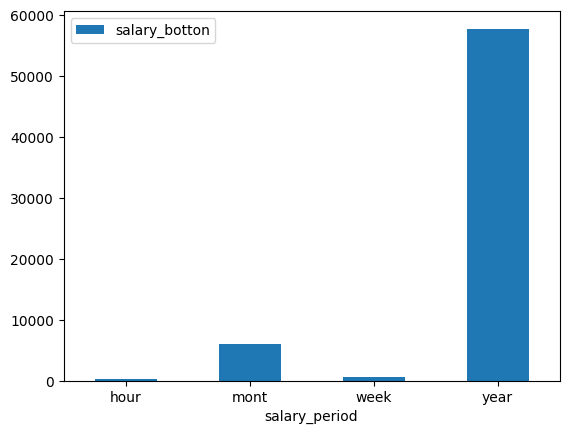

In [ ]:
sdata = df.groupby("salary_period")["salary_botton"].mean().reset_index()
sdata.plot.bar(x='salary_period', y='salary_botton', rot=0)

**Что мы можем увидеть?**

Зарплата также может быть указана в месяц (month) и в неделю (week) – учтите это при составлении общего регулярного выражения.

Также в начале некоторых строк есть лишние пробелы, которые мы также учитываем.

Разделим столбец `salary` на зарплаты от, до, временной интервал (час, месяц, год) и бонусы. Для строк не попавших ни в одну категорию или с NaN в колонке salary установим все как NaN.

Также добавим колонку которая разделяет тип предложений (от-до, от, до, нет).

#### Обработка колонки job_type

Выясните, какие форматы значений есть в столбце `job_type`. Сделайте выводы. При необходимости – стройте графики.

In [ ]:
job_type = df.loc[df['job_type'].notnull()]
job_type

,job_description,job_title,job_type,organization,sector,city,state,index,salary_botton,salary_top,salary_period
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,NaN,IT/Software Development,Madison,WI,53702,NaN,NaN,None
1,TeamSoft is seeking a Project Manager for the...,Project Manager Job in Madison,Full Time Temporary/Contract/Project,NaN,Project/Program Management,Madison,WI,53702,NaN,NaN,None
2,RESPONSIBILITIES:Kforce has a client seeking a...,Systems Engineer Job in Madison,"Full Time, Temporary/Contract/Project",NaN,Experienced (NonyearManager),Madison,WI,53702,NaN,NaN,None
3,"Hi, We are looking for a Share...",SharePoint Admin year In Person Interview Job ...,Full Time,NaN,NaN,Madison,WI,53702,NaN,NaN,None
4,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,Printing and Publishing,NaN,Madison,WI,53708,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
20001,Contract HR AssistantPay Rate: $15year$25/hr.;...,HR Assistant Job in Chicago,Part Time,Staffing/Employment Agencies,Human Resources,NaN,NaN,NaN,NaN,NaN,None
20002,Summary Event Specialist Part Time Sales Are...,Event Specialist Part Time Sales Job in Colera...,Part Time Employee,Retail,Marketing/Product,Colerain Township,OH,NaN,NaN,NaN,None
20003,NaN,Junior Accountant Job in Chicago,Full Time Temporary/Contract/Project,Accounting and Auditing Services,NaN,NaN,NaN,NaN,NaN,NaN,None
20004,Associate Customer Business Manager Location: ...,Associate Customer Business Manager Job in Cin...,Full Time Employee,NaN,Sales/Retail/Business Development,NaN,NaN,NaN,NaN,NaN,None


В данном столбце можновыделить следующие форматы - содержащие только полноту занятности, содержащие только тип занятости, содержащие оба вышеперечисленных значения.

Вы заметили, что многие значения фактически одинаковые, но немного по-разному отформатированы? Приведем их к единому формату.

In [ ]:
df['employment_type'] = None
df['employment_time'] = None
for row in df.iterrows():
    if re.search(r'\D{,10} Time', str(row[1]['job_type'])):
      row[1]['employment_time'] = re.search('\D{,10} Time', str(row[1]['job_type']))[0]
      row[1]['employment_type'] = str(row[1]['job_type']).replace(row[1]['employment_time'], '').replace(',', '').replace(' ', '').replace('/', '')
    else:
      row[1]['employment_type'] = str(row[1]['job_type'])
df = df.replace('' , np.nan , regex= True).replace('nan', np.nan , regex= True)
df = df.drop(['job_type'], axis=1)

In [ ]:
df.sample(10)

,job_description,job_title,organization,sector,city,state,index,salary_botton,salary_top,salary_period,employment_type,employment_time
14801,NaN,Housekeeper,NaN,Student (High School),Southampton,NY,NaN,50000.0,50000.0,year,None,None
4889,"Do you have a strong desire to help others, wh...",Medical Assistants Job in Davenport,Healthcare Services,Entry Level,Davenport,IA,52801,12.0,20.0,year,None,None
3399,• To test the different services and API’s nee...,API Tester w Python Scripting experience Job i...,All,IT/Software Development,Philadelphia,PA,19103,NaN,NaN,None,None,None
6277,Job Description:Construction Service Company i...,PAYROLL/HR Assistant for CONSTRUCTION Company $,Other/Not Classified,Experienced (NonyearManager),Escondido,CA,92029,NaN,NaN,None,None,None
12791,NaN,SAS/Statistician,Biotechnology/Pharmaceuticals,Biotech/R&D/Science,Westwood,NJ,07677,80000.0,220000.0,year,None,None
9411,ChoiceLegal.com (not Choice Legal Group) is hi...,Legal Assistant Job in Tampa,Legal Services,Experienced (NonyearManager),Tampa,FL,33619,12.0,12.0,hour,None,None
9953,Drive your Future! Pilot Flying J is committed...,Retail Cashier Job in Powell,Retail,Sales/Retail/Business Development,Powell,TN,37849,NaN,NaN,None,None,None
12645,NaN,Director of Sales and Marketing Job in Savannah,NaN,Manager (Manager/Supervisor of Staff),Savannah,GA,31401,NaN,NaN,None,None,None
6357,NaN,Inside Sales Representative year Irving TX Job...,NaN,Sales/Retail/Business Development,Irving,TX,75062,NaN,NaN,None,None,None
9496,NaN,QA ENGINEER ( must have Selenium ) Job in Dallas,All,Experienced (NonyearManager),Dallas,TX,75202,NaN,NaN,None,None,None


Разделили колонку job_type на две - employment_time и employment_type.

Колонку `job_description` оставим без изменения, так как она содержит текстовое описание вакансии.

### Столбцы job_title, organization, sector

Для столбцов `job_title`, `organization` и `sector` самостоятельно выявите и реализуйте этапы анализа.

В обработке столбца sector при формате перечисления в виде сектор1\сектор2\сектор3 и т.д. берем только первый сектор, иначе берем первое слово до пробела. 

In [ ]:
df['main_sector'] = None
for i, row in df.iterrows():
    if re.search(r'\w{,15}[/]', str(row['sector'])):
      m = re.search(r'\w{,15}[/]', str(row['sector']))[0].replace('/', '')
      df.at[i,'main_sector'] = m
    elif re.search(r'\w{,15}[ ]\w{,15}', str(row['sector'])):
      m = re.search(r'\w{,15}[ ]\w{,15}', str(row['sector']))[0]
      df.at[i,'main_sector'] = m

In [ ]:
df = df.replace('' , np.nan , regex= True).replace('nan', np.nan , regex= True)
df = df.drop(['sector'], axis=1)
df.sample(10)

,job_description,job_title,organization,city,state,index,salary_botton,salary_top,salary_period,employment_type,employment_time,main_sector
7082,NaN,Sr. IT Security Audit Readiness Analyst Job in...,Biotechnology/Pharmaceuticals,Sunnyvale,CA,94085,NaN,NaN,None,None,None,Experienced
8298,Spanish Teacher for busy Executive. Candidate ...,Spanish Tutor Job in Dallas,Other/Not Classified,Dallas,TX,75219,20.0,25.0,hour,None,None,None
8271,Senior Engineer – SoundyearRelations – Palo Al...,Software Engineer,All,Palo Alto,CA,94301,NaN,NaN,None,None,None,Experienced
9430,NaN,Staff Accountant Job in Providence,NaN,Providence,RI,02903,NaN,NaN,None,None,None,Experienced
19809,Job DescriptionKindred at Home company is curr...,Caregiver year Home Health Aide Job in San Fra...,Healthcare Services,NaN,NaN,NaN,NaN,NaN,None,None,None,Medical
10533,Randstad is hiring immediately for multiple wa...,Warehouse General Laborer/Picker/Packer year B...,Other/Not Classified,Milwaukee,WI,53223,12.0,13.0,hour,None,None,None
16541,CR England has an IMMEDIATE NEED for Truck Dri...,Experienced CDLyearA Driver Needed in Californ...,Transport and Storage year Materials,Palo Alto,CA,NaN,NaN,NaN,None,None,None,Logistics
12759,RESPONSIBILITIES:Kforce has a Healthcare clien...,EPIC PB Resolute Analyst Job in Tukwila,NaN,Tukwila,WA,98168,NaN,NaN,None,None,None,Experienced
18621,Job Reference Code 489020 Industrial Manufact...,Supervisor,Manufacturing year Other,Umatilla,OR,NaN,NaN,NaN,None,None,None,Manufacturing
9494,Job Requirements:As an IT Support Technician w...,IT Support Technician Job in Dallas,All,Dallas,TX,75202,NaN,NaN,None,None,None,Experienced


При обработке столбца job_title будет проверять, нет ли в названии города, в котором эта вакансия опубликована.

In [ ]:
for i, row in df.iterrows():
    if re.search(r'.{,100} Job in .{,15}', str(row['job_title'])):
      m = re.search(r'.{,100} Job in .{,15}', str(row['job_title']))[0].split('Job in')
      df.at[i,'job_title'] = m[0]
      df.at[i,'city'] = m[1]


In [ ]:
df.sample(10)

,job_description,job_title,organization,city,state,index,salary_botton,salary_top,salary_period,employment_type,employment_time,main_sector
15378,Report this job About the Job Petco – Marysvil...,Petco Job Application for Marysville Petco Job...,Retail,Address Marysville,WA,98271,NaN,NaN,None,None,None,None
574,"International Logic Systems, Inc. (ILS) has an...",Contract Specialist,NaN,Washington,DC,NaN,NaN,NaN,None,None,None,Experienced
19601,Report this job About the Job Senior Software ...,Monster,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
13476,&nbsp; &nbsp; City:&nbsp; MUSKOGEE State:&nbsp...,QUALITY CONTROL TECH year MUSKOGEE,NaN,Muskogee,OK,NaN,NaN,NaN,None,None,None,None
6595,Advertising Sales Account Executive Our Advert...,Advertising Sales Representative,AllBusiness Services year Other,Des Moines,IA,50302,40000.0,100000.0,year,None,None,Sales
18732,Job Description: Assess potential new supplier...,Quality Engineer II,"San Jose, CA 95134",San Jose,NaN,NaN,NaN,NaN,None,None,None,Assurance
2504,The Helen Ross McNabb Center (www.mcnabbcenter...,Great Starts Masters Team Leader year Resident...,Healthcare Services,Knoxville,TN,37917,NaN,NaN,None,None,None,Medical
16399,THIS IS A REMOTE POSITIONPRIMARY SKILLS: Advan...,Systems Administrator,"Dallas, TX",Dallas,NaN,NaN,NaN,NaN,None,None,None,IT
5813,RPS Klotz Associates is hiring a Project Engin...,Project Engineer Municipal Services,Engineering Services,Houston,TX,77079,NaN,NaN,None,None,None,None
12807,Position Title: Sit Down & Stand Up Forklift O...,Sit Down & Stand Up Forklift Operator,Other/Not Classified,Austin,TX,78753,12.0,13.0,hour,None,None,None


### Краткая статистика очищенных данных

Проанализируйте результаты обработки данных. 
1. Сравните, что было до и после.
Очистка данных значительно улучшила наборы, убрав повторяющиеся строки, унифицировав формат адреса, зарплаты, сектора, типа занятости. Теперь можно обращаться к этим признакам, чего нельзя было делатьдо приведения данных к единому формату.
2. Задачи, которые можно решать с помощью данного датасета:

-анализировать спрос на профессии определенной сферы как во всей стране, так и в отдельных штатах.

-анализировать уровень заработной платы и выявлять различия между отдельными секторами и регионами страны.

-оценивать рыночную конкуренцию

И другие задачи, связанные с анализом рынка труда.